In [3]:
# Binh Nguyen, April 5, 2021
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10,6)

In [39]:
# load data
df = pd.read_csv('Dec2020/main_power.csv')

In [12]:
df.dtypes

sensor     object
type       object
uptime      int64
v         float64
a         float64
w         float64
kwh       float64
hz        float64
pf        float64
time       object
dtype: object

In [13]:
df.head()

,sensor,type,uptime,v,a,w,kwh,hz,pf,time
0,main_power,json,40240,227.0,0.694,116.1,0.574,49.9,0.74,2020-12-01 07:07:55
1,main_power,json,40271,227.3,0.698,117.8,0.575,49.9,0.74,2020-12-01 07:08:26
2,main_power,json,40302,227.0,0.756,134.1,0.577,50.0,0.78,2020-12-01 07:08:57
3,main_power,json,40333,227.3,0.712,122.3,0.577,50.1,0.76,2020-12-01 07:09:28
4,main_power,json,40364,227.3,0.721,123.4,0.579,50.0,0.75,2020-12-01 07:09:59


In [14]:
df = df[['time', 'w', 'kwh']]

In [15]:
df.head()

,time,w,kwh
0,2020-12-01 07:07:55,116.1,0.574
1,2020-12-01 07:08:26,117.8,0.575
2,2020-12-01 07:08:57,134.1,0.577
3,2020-12-01 07:09:28,122.3,0.577
4,2020-12-01 07:09:59,123.4,0.579


In [16]:
df['time'] = pd.to_datetime(df['time'])

In [18]:
df.set_index('time', inplace=True)

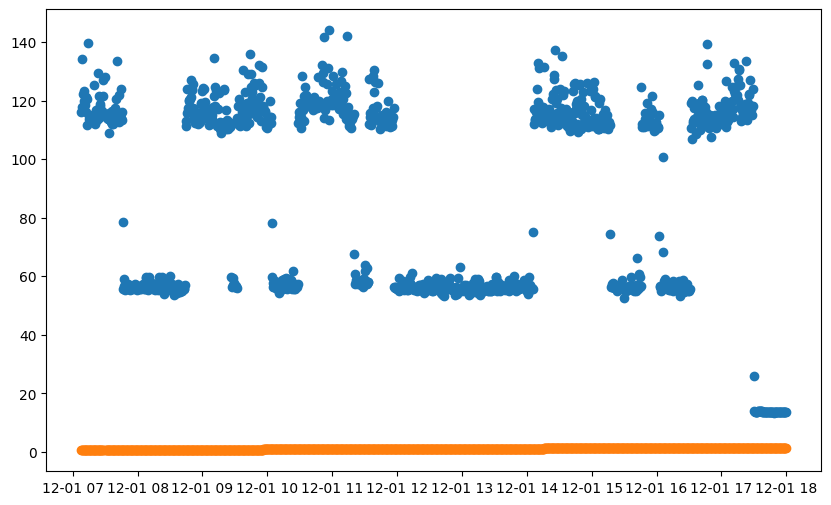

In [29]:
# let check if what the gap is (and there is missing data points)
plt.plot(df, ls='', marker='o')

In [24]:
# filter out missing out data period
import datetime 
end = datetime.datetime(2020,12,1,18)

In [26]:
# query is one quick approach to select data
df = df.query('time < @end')

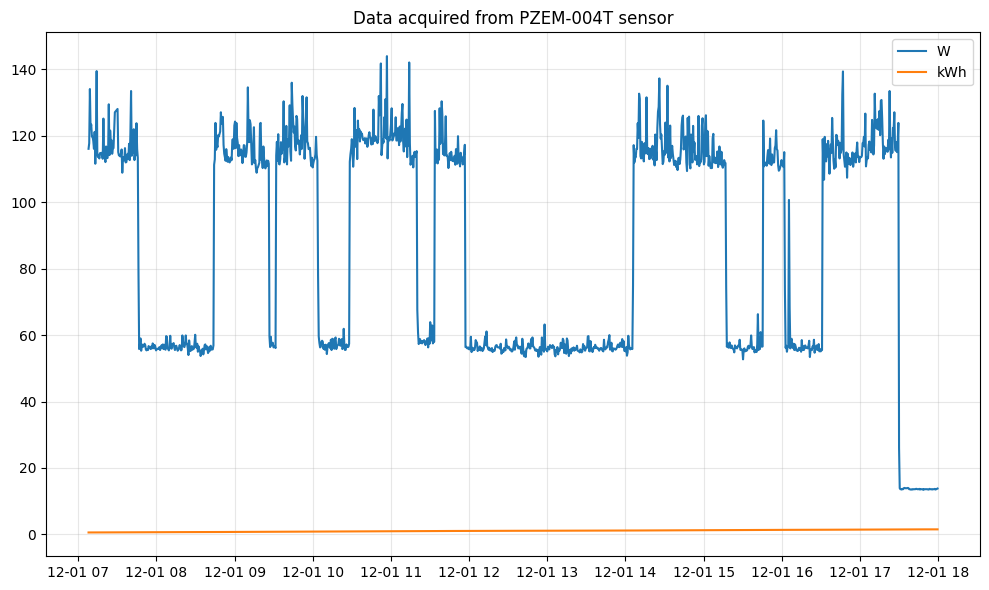

In [38]:
# let make a good graph
plt.plot(df)
plt.grid(alpha=0.3)
plt.legend(['W', 'kWh'])
plt.title('Data acquired from PZEM-004T sensor')
plt.tight_layout()
plt.savefig('img/power.png')